In [6]:
import pandas as pd
df=pd.read_csv('churn.csv')
df

,Unnamed: 0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1
...,...,...,...,...,...,...,...,...
895,895,Paul Miller,42.0,12800.82,1,3.62,8.0,0
896,896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,0
897,897,Ana Smith,45.0,12056.18,0,5.46,4.0,0
898,898,Justin Leonard,51.0,6517.93,1,5.47,10.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       900 non-null    int64  
 1   Names            900 non-null    object 
 2   Age              900 non-null    float64
 3   Total_Purchase   900 non-null    float64
 4   Account_Manager  900 non-null    int64  
 5   Years            900 non-null    float64
 6   Num_Sites        900 non-null    float64
 7   Churn            900 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 56.4+ KB


In [8]:
df.describe()

,Unnamed: 0,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,449.500000,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,259.951919,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,0.000000,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,224.750000,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,449.500000,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,674.250000,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,899.000000,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [11]:
df = df.drop('Unnamed: 0', axis=1)
df

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1
...,...,...,...,...,...,...,...
895,Paul Miller,42.0,12800.82,1,3.62,8.0,0
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,0
897,Ana Smith,45.0,12056.18,0,5.46,4.0,0
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,0


In [12]:
df.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Churn              0
dtype: int64

In [23]:
#Özellik ve Hedef Değişkeni Ayırıyoruz
X = df.drop(['Churn', 'Names'], axis=1)
y = df['Churn']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                  test_size=0.3,
                                                  random_state=42)

In [25]:
print("Eğitim veri sayısı:", X_train.shape[0])
print("Test veri sayısı:", X_test.shape[0])
print("Churn oranı (eğitim):", y_train.mean())
print("Churn oranı (test):", y_test.mean())

Eğitim veri sayısı: 630
Test veri sayısı: 270
Churn oranı (eğitim): 0.16984126984126985
Churn oranı (test): 0.15925925925925927


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [34]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0])

In [35]:
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_prob_lr

array([4.06081526e-01, 1.97703435e-01, 1.92688158e-02, 1.26179601e-01,
       6.65721603e-01, 1.79747984e-01, 8.27109222e-02, 7.19571081e-01,
       8.14135114e-01, 9.55521265e-01, 7.45528632e-01, 1.17887093e-01,
       9.28434894e-02, 6.87467015e-01, 2.07284251e-03, 1.63238063e-01,
       2.04194433e-01, 4.85824493e-02, 1.83073991e-02, 6.32591700e-01,
       2.00959088e-01, 2.77311229e-03, 3.05560183e-02, 6.43106872e-04,
       4.53587143e-02, 3.24156102e-03, 7.01485012e-02, 1.96894019e-01,
       1.37736702e-01, 4.40921229e-02, 5.10129364e-03, 1.73952545e-02,
       1.24315746e-01, 1.18773980e-01, 2.40332104e-03, 1.89636368e-01,
       8.41863036e-01, 1.90500746e-02, 5.69627051e-01, 2.09648613e-03,
       9.36382049e-01, 2.50000437e-03, 6.12945728e-02, 1.99957214e-01,
       5.03416021e-03, 7.91137744e-02, 6.46169589e-01, 3.98542983e-02,
       1.88146036e-02, 4.53582379e-03, 1.04322232e-02, 3.65680312e-02,
       2.75327246e-02, 1.18032080e-01, 1.88706125e-02, 5.11961284e-01,
      

In [36]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       227
           1       0.72      0.60      0.66        43

    accuracy                           0.90       270
   macro avg       0.82      0.78      0.80       270
weighted avg       0.89      0.90      0.90       270



In [38]:
#koefisiyentler (ağırlıklar). Bu değerler bize, her bir özelliğin (feature) churn üzerindeki etkisini ve yönünü anlatır.
#Pozitif katsayı → churn olasılığını artırır...Negatif katsayı → churn olasılığını azaltır...Katsayının büyüklüğü → etki gücü (ölçeklere dikkat!)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
coefficients

,Feature,Coefficient
4,Num_Sites,1.218021
3,Years,0.550594
2,Account_Manager,0.407022
0,Age,0.067983
1,Total_Purchase,0.000040


In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

print("📋 Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("🎯 AUC Score:", round(roc_auc_score(y_test, y_prob_dt), 3))

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       227
           1       0.74      0.47      0.57        43

    accuracy                           0.89       270
   macro avg       0.82      0.72      0.75       270
weighted avg       0.88      0.89      0.88       270

📊 Confusion Matrix:
[[220   7]
 [ 23  20]]
🎯 AUC Score: 0.841


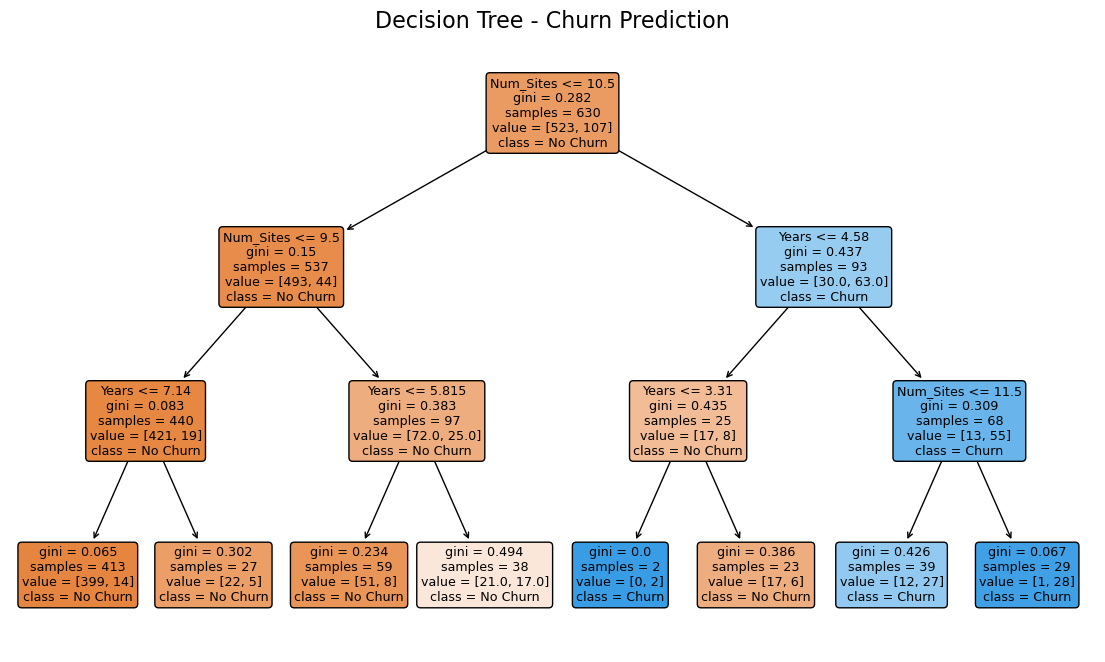

In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=["No Churn", "Churn"],
          filled=True,
          rounded=True)
plt.title("Decision Tree - Churn Prediction", fontsize=16)
plt.show()


In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("📋 Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("🎯 AUC Score:", round(roc_auc_score(y_test, y_prob_rf), 3))

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       227
           1       0.73      0.44      0.55        43

    accuracy                           0.89       270
   macro avg       0.82      0.71      0.74       270
weighted avg       0.87      0.89      0.87       270

📊 Confusion Matrix:
[[220   7]
 [ 24  19]]
🎯 AUC Score: 0.875


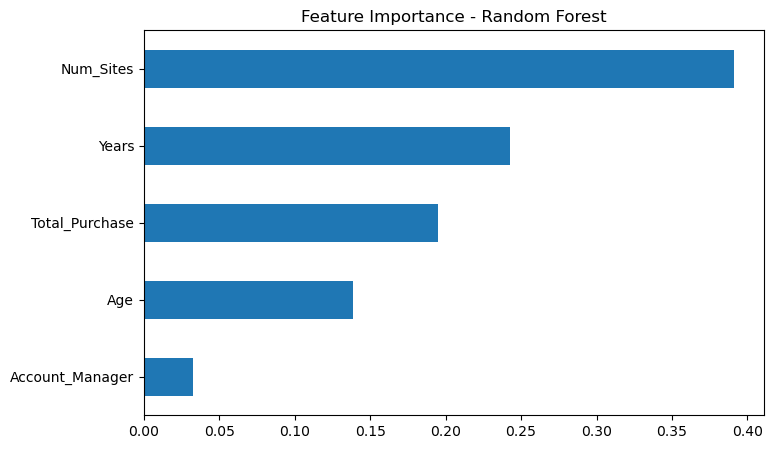

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(8, 5))
plt.title("Feature Importance - Random Forest")
plt.show()

In [52]:
sample = pd.DataFrame([{
    "Age": 45,
    "Total_Purchase": 9000.0,
    "Account_Manager": 1,
    "Years": 3.5,
    "Num_Sites": 11
}])
prediction = lr_model.predict(sample)[0]
probability = lr_model.predict_proba(sample)[0][1]

In [53]:
print("Tahmin edilen churn durumu:", "Churn Olur" if prediction == 1 else "Kalır")
print("Churn olasılığı:", round(probability * 100, 2), "%")

Tahmin edilen churn durumu: Kalır
Churn olasılığı: 37.22 %
